 ### Практикум по оптимизации 5

Колесов Александр

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

Let's  consider the matrix's function 
$$f(x) = \frac{1}{2}x^{T}Ax - b^{T}x + c$$

$$\nabla f(x) = Ax - b$$

In [3]:
f = lambda x,A,b,c: np.float(.5*x.T*A*x - b.T*x + c)

In [165]:
df = lambda A,x,b: A*x - b

In [261]:
A = np.matrix([[3.0,2.0],[2.0,6.0]])
b = np.matrix([[2.0],[-8.0]])
c = 0.0

#### 1. Drawing plot

Let's draw the plot of the function by 2 ways of visualization as follow

In [122]:
def draw_plot(A,b,c):   
    size = 100
    x = np.linspace(-6,6,size)
    y = np.linspace(-6,6,size)
    x_mesh, y_mesh = np.meshgrid(x,y)
    z = np.array([ [f(np.array([[xps[i]],[yps[0]]]),A,b,c) for i in range(len(xps))] for xps,yps in zip(x_mesh,y_mesh)])
    
    fig,ax = plt.subplots(figsize=(10,8))
    ax = fig.gca(projection='3d')
    ax.plot_surface(x_mesh,y_mesh,z,cmap='rainbow')
    plt.show();

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  if __name__ == '__main__':


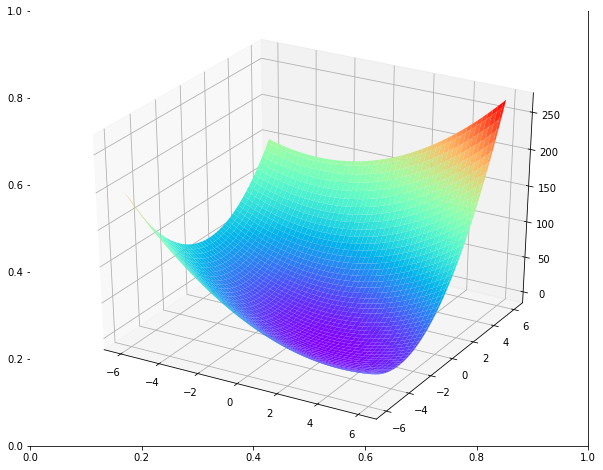

In [123]:
draw_plot(A,b,c)

The second way to draw this plot by python

In [60]:
def bowl(A, b, c):
    fig = plt.figure(figsize=(10,8))
    qf = fig.gca(projection='3d')
    size = 20
    x1 = list(np.linspace(-6, 6, size))
    x2 = list(np.linspace(-6, 6, size))
    x1, x2 = np.meshgrid(x1, x2)
    zs = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            x = np.matrix([[x1[i,j]], [x2[i,j]]])
            zs[i,j] = f(x, A, b, c)
    qf.plot_surface(x1, x2, zs, rstride=1, cstride=1, cmap='rainbow', linewidth=0)
    fig.show()
    return x1, x2, zs

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


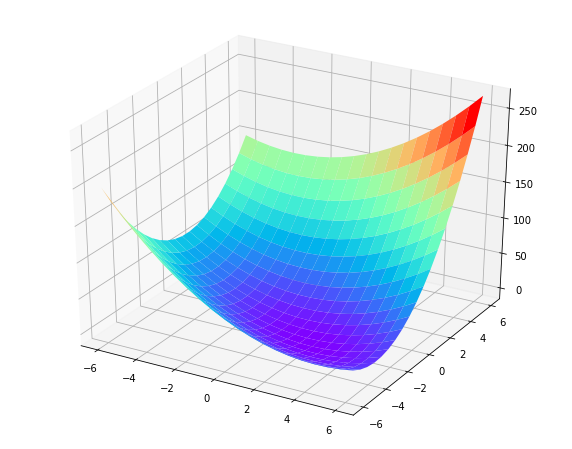

In [68]:
x1, x2, zs = bowl(A, b, c)

#### 2. Drawing contours

Now, let us turn to the drawing of contours

In [255]:
def draw_contours(A,b,c,steps):
    
    size = 100
    x = np.linspace(-6,6,size)
    y = np.linspace(-6,6,size)
    x_mesh,y_mesh = np.meshgrid(x,y)
    z = np.array([[f(np.array([[xps[i]],[yps[0]]]),A,b,c) for i in range(len(xps))] for xps,yps in zip(x_mesh,y_mesh)])
    
    fig,ax = plt.subplots(figsize=(10,8))
    CS = ax.contour(x_mesh,y_mesh,z,cmap='viridis',labels=np.arange(0,20))
    ax.clabel(CS,fontsize=8)
    if steps is not None:
        steps = np.matrix(steps)
        plt.plot(steps[:,0], steps[:,1], '-o')
    plt.show();

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The following kwargs were not used by contour: 'labels'
  # Remove the CWD from sys.path while we load stuff.


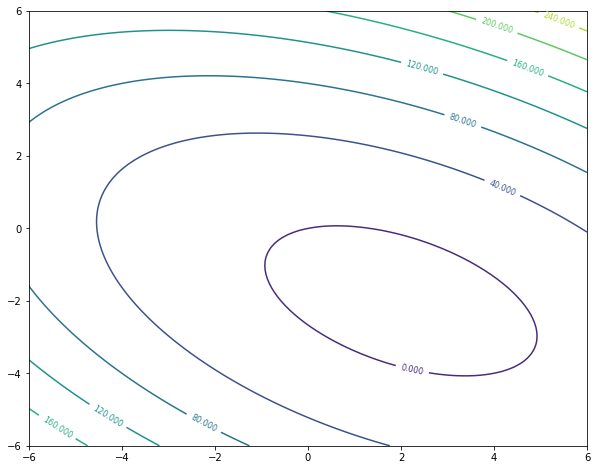

In [134]:
draw_contours(A,b,c,None);

#### 3.Steepest Descent by hands

$$x_{k + 1} = x_{k} - \alpha_{k} \nabla f(x_{k})$$
$$r = b - A x_{k} = -\nabla f(x_{k})$$
$$ \alpha_{k} = \frac{(r_{k})^{T} r_{k} }{(r_{k})^{T} A r_{k}}$$

In [28]:
def steepest_descent(A,b,c,x_prev,epsilon):
    steps = [(float(x_prev[0]),float(x_prev[1]))]
    num_iter = 1      
    residual = b - A*x_prev
    while(np.linalg.norm(residual) > np.linalg.norm(epsilon)):
         
        alpha = float((residual).T * residual / ((residual).T * (A * residual)))
        x_next = x_prev + alpha*residual
        steps.append((x_next[0,0],x_next[1,0]))
        num_iter += 1
        
        x_prev = x_next
        residual = b - A*x_next
        
    return (x_next,steps,num_iter)

In [37]:
output = steepest_descent(A,b,c,np.matrix([[-2.0],[-2.0]]),np.matrix([[1e-1],[1e-1]]))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The following kwargs were not used by contour: 'labels'
  # Remove the CWD from sys.path while we load stuff.


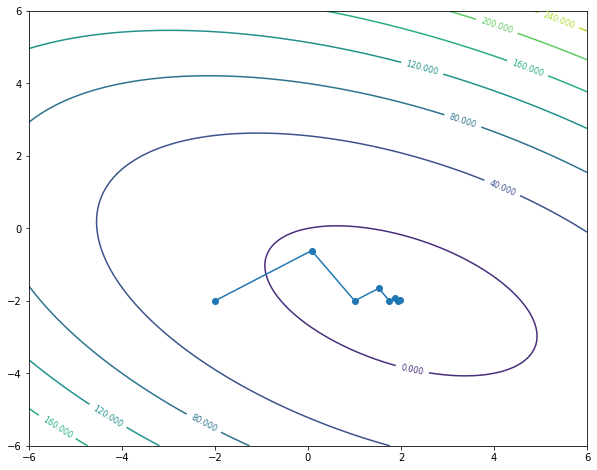

In [40]:
draw_contours(A,b,c,output[1])

#### 4. Model of steepest descent

In [296]:
class SteepestDescentModel():
    
    def __init__(self,function,derivative,epsilon,x_prev = None):
        self.f = function
        self.g = derivative
        self.epsilon = epsilon
        
        self.vars = np.matrix([[0],[0]])
        
        if x_prev is not None:
            self.vars[0,0] = x_prev[0,0]
            self.vars[1,0] = x_prev[1,0]
        
        self.x_history = []
        self.y_history = []
        self.z_history = []
            
    def func(self,variables,A,b,c):
        z = self.f(variables,A,b,c)
        return z
        
    def gradients(self,A,variables,b):
        grads = self.g(A,variables,b)
        return grads
    
    def update_rule(self,gradients):
        #self.alpha = 1 / np.linalg.norm(gradients)
        residual = (-1)*gradients
        self.alpha = float((residual.T*residual)/(residual.T*(A*residual)))
        self.vars = self.vars - (self.alpha)*gradients
        
    def update_history(self,z,x,y):
        self.x_history.append(x)
        self.y_history.append(y)
        self.z_history.append(z)
        
    def train(self,max_iter):
        
        pre_x = -500
        A = np.matrix([[3.0,2.0],[2.0,6.0]])
        b = np.matrix([[2.0],[-8.0]])
        c = 0.0
        
        for i in range(max_iter):
            self.z = self.func(self.vars,A,b,c)
            self.x = self.vars[0,0]
            self.y = self.vars[1,0]
            self.update_history(self.z,self.x,self.y)
            self.gradient = self.gradients(A,self.vars,b)
            self.update_rule(self.gradient)
            
            if((np.linalg.norm(np.subtract(pre_x,self.vars[0,0]))) < self.epsilon):
                break
            pre_x = self.x
            
        self.x_history = np.array(self.x_history)
        self.y_history = np.array(self.y_history)

In [297]:
stepdsc = SteepestDescentModel(f,df,1e-2,np.matrix([[-2.0],[-2.0]]))

In [298]:
stepdsc.train(100)

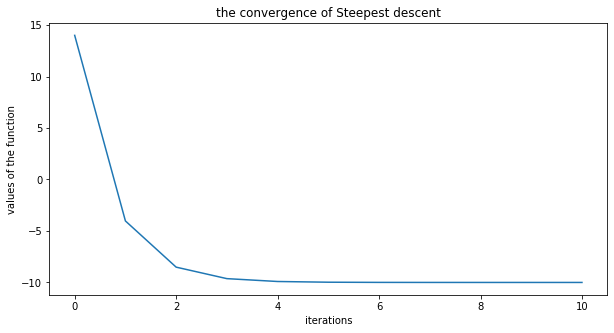

In [299]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(stepdsc.z_history)
ax.set_title("the convergence of Steepest descent")
plt.xlabel("iterations")
plt.ylabel("values of the function")
plt.show();

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The following kwargs were not used by contour: 'labels'
  # Remove the CWD from sys.path while we load stuff.


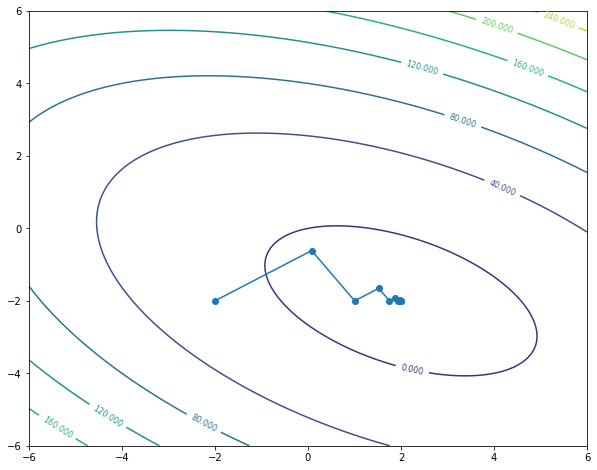

In [300]:
trajectory = [(float(x),float(y)) for x,y in zip(stepdsc.x_history,stepdsc.y_history)]
draw_contours(A,b,c,trajectory)

Let's look one iteration

#### 5.  Gradient Descent  by hands

In [52]:
def gradient_descent(A,b,c,x_prev,learning_rate,epsilon):
    
    
    steps = [(float(x_prev[0]),float(x_prev[1]))]
    num_iter = 1
    derivative = b - A*x_prev
    x_next = x_prev + learning_rate*derivative
    steps.append((x_next[0,0],x_next[1,0]))
    
    while(np.linalg.norm(derivative) > np.linalg.norm(epsilon)):
        
        x_prev = x_next
        x_next = x_prev + learning_rate*derivative
        steps.append((x_next[0,0],x_next[1,0]))
        derivative = b - A*x_next
        num_iter += 1

    return(x_next, num_iter, steps)

In [56]:
output_gd = gradient_descent(A,b,c,np.matrix([[-2.0],[-2.0]]),0.12,np.matrix([[1e-1],[1e-1]]))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The following kwargs were not used by contour: 'labels'
  # Remove the CWD from sys.path while we load stuff.


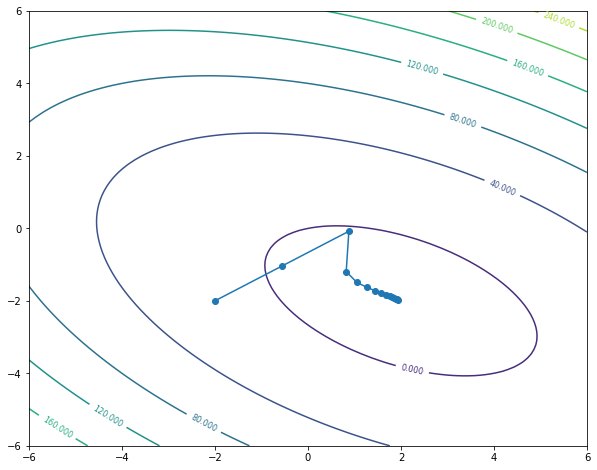

In [58]:
draw_contours(A,b,c,output_gd[2])

#### 6. The model of Gradient Descent 

In [226]:
class GradientDescentModel():
    def __init__ (self, function, gradient, learning_rate, epsilon ,x_prev = None,y_prev = None):
        self.f = function
        self.g = gradient
        self.lr = learning_rate
        self.epsilon = epsilon
        
        scale = 10
        self.vars = np.matrix([[100],[100]])
        x_prev = np.matrix([[x_prev],[y_prev]])
        
        for i in range(2):
            if x_prev[i,0] is not None:
                self.vars[i,0] = x_prev[i,0]
            else:
                self.vars[i,0] = np.random.uniform(low = -scale, high = scale)
                
        self.x_history = []
        self.y_history = []
        self.z_history = []
        
    def func(self, variables,A,b,c):
        
        value = self.f(variables,A,b,c)
        return value
        
    def grad(self, A,variables,b):
        
        grad = self.g(A,variables,b)
        return grad
        
    def update_rule(self,grad):
        self.vars = self.vars - self.lr*grad
        
    def update_history(self,z,x,y):
        self.x_history.append(x)
        self.y_history.append(y)
        self.z_history.append(z)
        
    def train(self,max_steps):
        
        pre_x = -500
        A = np.matrix([[3.0,2.0],[2.0,6.0]])
        b = np.matrix([[2.0],[-8.0]])
        c = 0.0
        
        for i in range(max_steps):
            
            
            self.z = self.func(self.vars,A,b,c)
            self.x = self.vars[0]
            self.y = self.vars[1]
            self.update_history(self.z,self.x,self.y)
            
            self.grads = self.grad(A,self.vars,b)
            self.update_rule(self.grads)
            
            if (np.linalg.norm(np.subtract(self.x,pre_x)) < self.epsilon):
                break
                
            pre_x = self.x
            
        self.x_history = np.array(self.x_history)
        self.y_history = np.array(self.y_history)

In [227]:
gd = GradientDescentModel(f,df,0.12,1e-1,-2.0,-2.0)

In [228]:
gd.train(100)

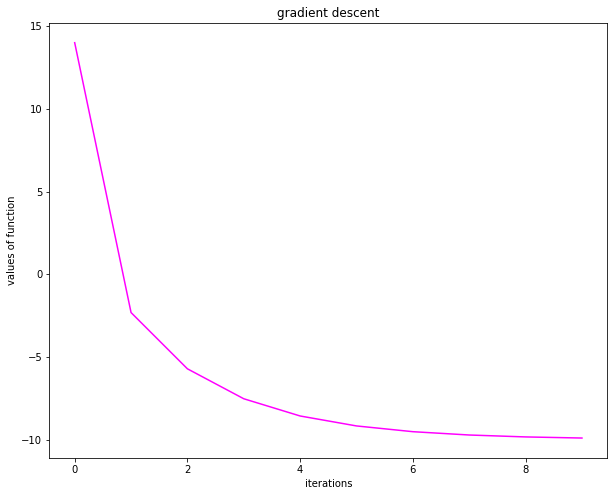

In [304]:
fig,ax = plt.subplots(figsize=(10,8))
ax.set_title("gradient descent")
plt.xlabel("iterations")
plt.ylabel("values of function")
ax.plot(gd.z_history,color='magenta')
plt.show();

In [252]:
yy = [float(y) for y in gd.y_history]
xx = [float(x) for x in gd.x_history] 
stes = [(x,y) for x,y in zip(xx,yy)]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The following kwargs were not used by contour: 'labels'
  # Remove the CWD from sys.path while we load stuff.


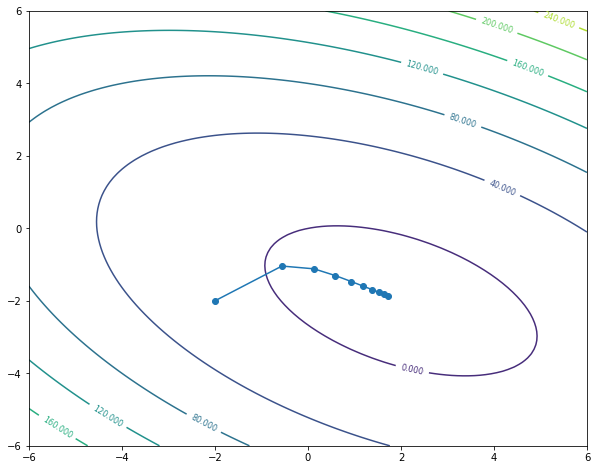

In [263]:
draw_contours(A,b,c,stes)

#### 7. Momentum based Gradient descent

$$h_{k+1} = \gamma h_{k} - \nabla{f(x_{k})}$$
$$x_{k+1} = x_{k} + \alpha h_{k+1}$$

In [316]:
class MomentumBasedGradientDescent():
    
    def __init__(self,function, derivative, epsilon, momentum, x_prev = None):
       
        self.f = function
        self.g = derivative
        self.epsilon = epsilon
        self.momentum = momentum
        
        scale = 10
        self.h = np.matrix([[0],[0]])
        self.vars = np.matrix([[0],[0]])
        
        if x_prev is not None:
            self.vars[0,0] = x_prev[0,0]
            self.vars[1,0] = x_prev[1,0]
        else:
            for i in range(2):
                self.vars[i,0] = np.random.uniform(low=-scale,high=scale)
            
        self.x_history = []
        self.y_history = []
        self.z_history = []
            
        
    def func(self,variables,A,b,c):
        z = self.f(variables,A,b,c)
        return z
        
    def derivative(self,A,variables,c):
        grads = self.g(A,variables,c)
        return grads
        
    def update_rule(self,gradients):
        self.h = self.momentum*self.h - gradients
        self.alpha = float(((self.h).T*self.h)/((self.h).T*(A*self.h)))
        self.vars = self.vars + self.alpha*self.h
        
    def update_history(self,z,x,y):
        self.x_history.append(x)
        self.y_history.append(y)
        self.z_history.append(z)
        
    def train(self,max_iter):
        
        pre_x = -500
        A = np.matrix([[3.0,2.0],[2.0,6.0]])
        b = np.matrix([[2.0],[-8.0]])
        c = 0.0
        
        for i in range(max_iter):
            self.z = self.func(self.vars,A,b,c)
            self.x = self.vars[0,0]
            self.y = self.vars[1,0]
            self.update_history(self.z, self.x, self.y)
            self.grad = self.derivative(A,self.vars,b)
            self.update_rule(self.grad)
            if( (np.linalg.norm(np.subtract(self.x,pre_x))) < self.epsilon):
                break
                
            pre_x = self.x
        
        self.x_history = np.array(self.x_history)
        self.y_history = np.array(self.y_history)

In [328]:
moment = MomentumBasedGradientDescent(f,df,1e-1,0.4,np.matrix([[-2],[-2]]))

In [329]:
moment.train(100)

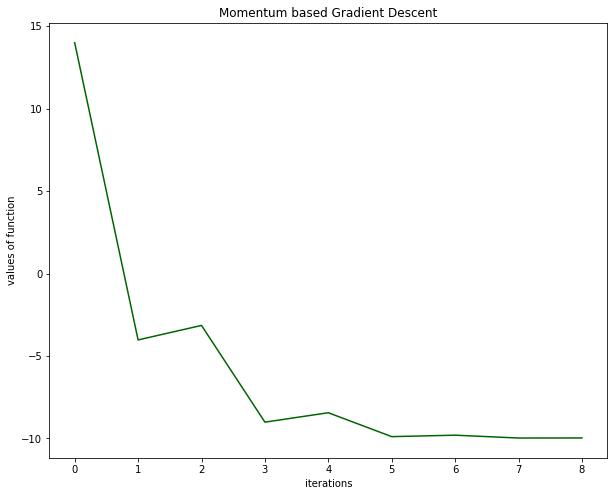

In [330]:
fig,ax = plt.subplots(figsize=(10,8))
ax.set_title("Momentum based Gradient Descent")
plt.xlabel("iterations")
plt.ylabel("values of function")
ax.plot(moment.z_history,color="darkgreen")
plt.show();

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The following kwargs were not used by contour: 'labels'
  # Remove the CWD from sys.path while we load stuff.


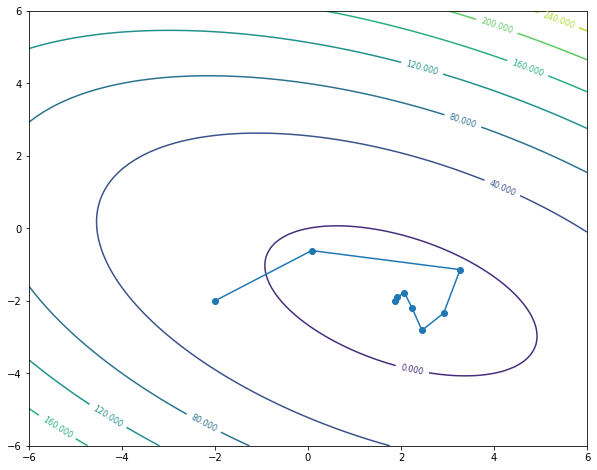

In [331]:
trajectory_moment = [(float(x),float(y)) for x,y in zip(moment.x_history,moment.y_history)]
draw_contours(A,b,c,trajectory_moment)

#### 8. Nesterov acceleration of Gradient Descent

#### 9. Conjugate gradients

#### 5.1 Conjugacy

First we introduce the notion of $\textit{A}$-orthogonal vectors, where $\textit{A}$ is the matrix with coefficients from our orignal equation  $\textbf{Ax=b}$ .
Take round quadratic bowl

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


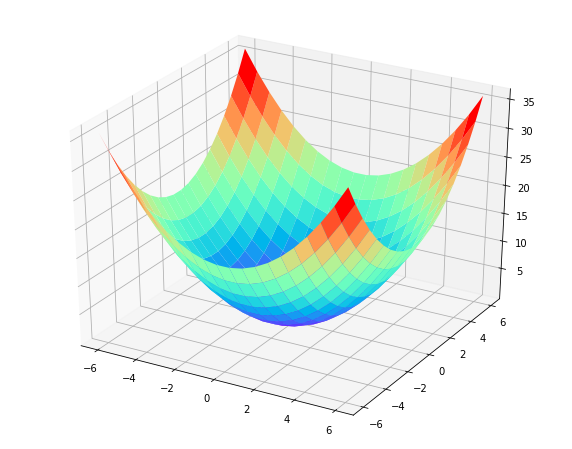

In [61]:
Around = np.matrix([[1, 0],[0, 1]])
bround = np.matrix([[0],[0]])
cround = 0
x1, x2, zs = bowl(Around, bround, cround)

In [63]:
def contoursteps(x1, x2, zs, steps=None):
    fig = plt.figure(figsize=(6,6))
    cp = plt.contour(x1, x2, zs, 10)
    plt.clabel(cp, inline=1, fontsize=10)
    if steps is not None:
        steps = np.matrix(steps)
        plt.plot(steps[:,0], steps[:,1], '-o')
    fig.show()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


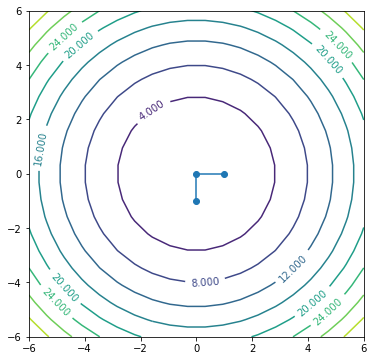

In [65]:
va = np.matrix([[1],[0]])
vb = np.matrix([[0],[-1]])
contoursteps(x1, x2, zs, [(va[0,0],va[1,0]),(0,0),(vb[0,0],vb[1,0])])

In [72]:
np.float(va.T*vb)

0.0

but they are  $\textbf{A}$ -othogonal under the matrix Ascaled:

In [73]:
np.float(va.T*A*vb)

-2.0

Vectors $\textbf{a}$ and $\textbf{b}$  will be A-orthogonal only so long as they are satisfyed to follow expression
$$\textit{$a^{T}$} A \textit{$b^{T}$} = 0$$

In [131]:
def conjugate_gradients(A, b, c, x, epsilon):
    
    num_iter = 1 
    steps = [(float(x[0]),float(x[1]))]
    
    r = b - A*x
    d = r
    # + 0*d
    deltanew = r.T*r
    while(np.linalg.norm(d) > np.linalg.norm(epsilon)):
        
        alpha = float((deltanew)/ float(d.T*(A*d)))
        x = x + alpha*d 
        
        steps.append((x[0,0],x[1,0]))
        
        r = b - A*x
        deltaold = deltanew
        deltanew = r.T*r
        #betta = -float((r.T*(A*d))/float(d.T*(A*d)))
        betta = float(deltanew/float(deltaold))
        d = r + betta*d
        
        num_iter+=1 
        
    return(x,num_iter,steps)

In [132]:
cg = conjugate_gradients(A,b,c,np.matrix([[-2.0],[-2.0]]),np.matrix([[1e-1],[1e-1]]))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The following kwargs were not used by contour: 'labels'
  # Remove the CWD from sys.path while we load stuff.


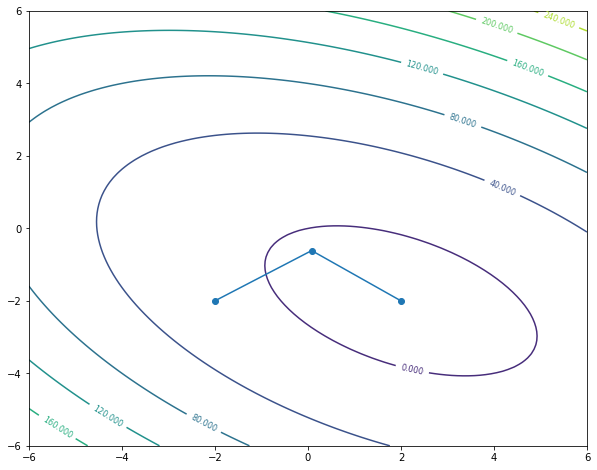

In [133]:
draw_contours(A,b,c,cg[2])

#### 10. Model of conjugate gradient Descent

In [357]:
class ModelConjugateDescent():
    
    def __init__(self,function, derivative, epsilon, x_prev = None):
        
        self.f = function
        self.g = derivative
        self.epsilon = epsilon
        
        scale = 10
        
        
        self.vars = np.matrix([[0],[0]])
        if x_prev is not None:
            self.vars[0,0] = x_prev[0,0]
            self.vars[1,0] = x_prev[1,0]
        else:
            for i in range(2):
                self.vars[i,0] = np.random.uniform(low = -scale,high = scale)
                
        self.x_history = []
        self.y_history = []
        self.z_history = []
        self.counter = 0
        
   
    def func(self,variables,A,b,c):
        z = self.f(variables,A,b,c)
        return z
        
    def gradients(self,A,variables,b):
        grad = self.g(A,variables,b)
        return grad
        
    def update_rule(self,gradients,counter):
        
        if(self.counter == 0):
            self.direct = gradients
            self.alpha = float((gradients.T*gradients)/(gradients.T*(A*gradients)))
            self.vars = self.vars - self.alpha*gradients
            self.counter = 1
        else:
            self.beta = float((gradients.T*(A*self.direct))/((self.direct).T*(A*self.direct)))
            self.direct = -gradients + self.beta*self.direct
            self.alpha = float(((self.direct).T*self.direct)/((self.direct).T*(A*self.direct)))
            self.vars = self.vars + self.alpha*self.direct
        
        
    def update_history(self,z,x,y):
        
        self.x_history.append(x)
        self.y_history.append(y)
        self.z_history.append(z)
        
    def train(self,max_iter):
        
        pre_x = -500
        A = np.matrix([[3.0,2.0],[2.0,6.0]])
        b = np.matrix([[2.0],[-8.0]])
        c = 0.0
        
        for i in range(max_iter):
            self.z = self.func(self.vars,A,b,c)
            self.update_history(self.z,self.vars[0,0],self.vars[1,0])
            self.gradient = self.gradients(A,self.vars,b)
            self.update_rule(self.gradient,self.counter)
            
            if(np.linalg.norm(np.subtract(pre_x,self.vars[0,0])) < self.epsilon):
                break
            pre_x = self.vars[0,0]
        
        self.x_history = np.array(self.x_history)
        self.y_history = np.array(self.y_history)      

In [358]:
conj = ModelConjugateDescent(f,df,1e-1,np.matrix([[-2.0],[-2.0]]))

In [359]:
conj.train(100)

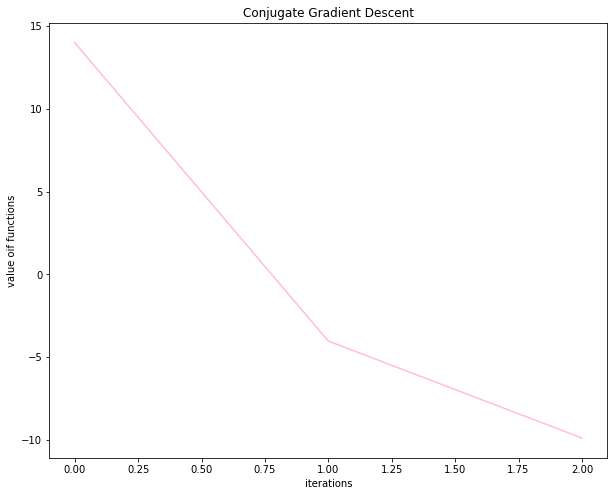

In [360]:
fig,ax = plt.subplots(figsize=(10,8))
ax.set_title("Conjugate Gradient Descent")
plt.xlabel("iterations")
plt.ylabel("value oif functions")
ax.plot(conj.z_history,color="pink")
plt.show();

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The following kwargs were not used by contour: 'labels'
  # Remove the CWD from sys.path while we load stuff.


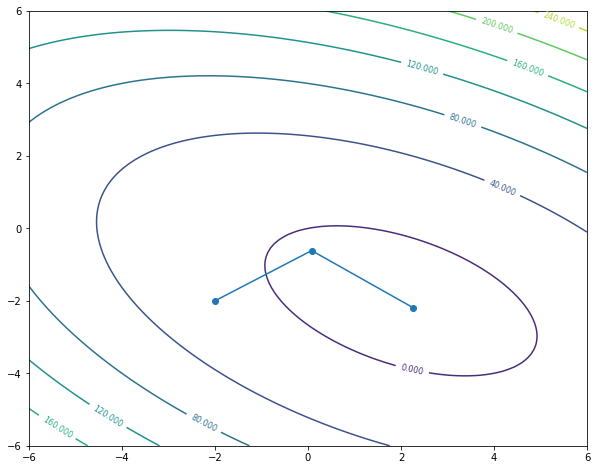

In [361]:
trajectory_conj = [(float(x),float(y)) for x,y in zip(conj.x_history,conj.y_history)]
draw_contours(A,b,c,trajectory_conj)